In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Top_Influencers.csv") 
df.head(15)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
6,7,\nkimkardashian,91,330.7m,3.5m,5.7k,0.005,1.7m,19.8b,United States
7,8,\nbeyonce,92,276.1m,3.6m,2.0k,0.008,2.2m,7.3b,United States
8,9,\nkhloekardashian,89,273.9m,2.4m,4.1k,0.002,404.7k,9.8b,United States
9,10,\njustinbieber,91,260.0m,1.9m,7.4k,0.007,1.7m,14.0b,Canada


# Data Cleaning

Data Preparation

- Remove /n before each chanel name

In [5]:
df = df.replace(r'\n',' ', regex=True) 
#set the rank to be the index of the data frame
df.set_index(df["Rank"])
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


- Drop any duplicate rows

In [6]:
df.drop_duplicates(inplace=True)
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


- Check if there is any missing data in each columns

Because only Country or Region column has missing data, when we do analysis using this column, we will drop those Na.

In [7]:

df[df.columns].isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      62
dtype: int64

Change Na to Undefined in Country or Region column

In [8]:
df["Country Or Region"].fillna("Undefined", inplace = True)

Create functions to convert unit M, K , B symbols into numbers 

In [9]:
def value_to_float_null(x): #when the column has a data with no unit
     
     if type(x) == float or type(x) == int:
        return x
     if "k" in x:
         return float(x.replace('k', '')) * 1000

     if "m" in x:
         return float(x.replace('m', '')) * 1000000
 
     if "b" in x:
         return float(x.replace('b', '')) * 1000000000

     return float(x)

def value_to_float_k(x): 
  #when the column has a data with k(thousand) unit as the smallest unit
     
     if type(x) == float or type(x) == int:
        return x
     if "k" in x:         
         return float(x.replace('k', '')) 
         
     if "m" in x:        
         return float(x.replace('m', '')) * 1000
         
     if "b" in x:
         return float(x.replace('b', '')) * 1000000

     return float(x)

def value_to_float_m(x): 
  #when the column has a data with m(millions) unit as the smallest unit
     
     if type(x) == float or type(x) == int:
        return x
         
     if "m" in x:        
         return float(x.replace('m', '')) 
         
     if "b" in x:
         return float(x.replace('b', '')) * 1000

     return float(x)

def value_to_float_b(x): 
  #when the column has a data with b(billions) unit as the smallest unit
     
     if type(x) == float or type(x) == int:
        return x
         
     if "b" in x:
         return float(x.replace('b', '')) 

     return float(x)

Check columns to see their units then apply function, and change column names



In [10]:
colList = ["Followers", "Avg. Likes","Posts","New Post Avg. Likes", "Total Likes"]
#numerical data

for col in colList:
  valType = ""
  for x in df[col]:  
    #check to see which type of unit in the column
    #billions, millions, thousands or null
    if "k" in str(x)  and "k" not in valType:
       valType = valType + "k"

    if "m" in str(x)  and "m" not in valType:
       valType = valType + "m"

    if "b" in str(x)  and "b" not in valType:
       valType = valType + "b"

    if "k" not in str(x) and "m" not in str(x) and "b" not in str(x) and "n" not in valType:
      valType= valType + "n"  #null unit
  
  print(valType)

  #use if condition to check from smallest unit to largest
  if "n" in valType:
    df[col] = df[col].apply(value_to_float_null)

  elif "k" in valType:    
    df[col] = df[col].apply(value_to_float_k)
    df.rename(columns={col : col + "(Thousands)"} , inplace = True)
    #rename column to add its unit

  elif "m" in valType:    
    df[col] = df[col].apply(value_to_float_m)
    df.rename(columns={col : col + "(Millions)"} , inplace = True)
    #rename column to add its unit

  elif "b" in valType:    
    df[col] = df[col].apply(value_to_float_b)
    df.rename(columns={col : (col + "(Billions)")} , inplace = True)
    #rename column to add its unit

m
mk
kn
mk
bm


Recheck dataframe

In [11]:
df.head(20)

,Rank,Channel Info,Influence Score,Followers(Millions),Avg. Likes(Thousands),Posts,60-Day Eng Rate,New Post Avg. Likes(Thousands),Total Likes(Millions),Country Or Region
0,1,cristiano,92,485.2,8700.0,3400.0,0.013,6300.0,29100.0,Spain
1,2,kyliejenner,91,370.7,8200.0,7000.0,0.014,5000.0,57400.0,United States
2,3,leomessi,90,363.9,6700.0,915.0,0.010,3500.0,6100.0,Undefined
3,4,selenagomez,93,348.8,6100.0,1900.0,0.005,1700.0,11400.0,United States
4,5,therock,91,339.4,1800.0,6800.0,0.003,932.0,12600.0,United States
5,6,arianagrande,92,333.0,3700.0,5000.0,0.009,3100.0,18500.0,United States
6,7,kimkardashian,91,330.7,3500.0,5700.0,0.005,1700.0,19800.0,United States
7,8,beyonce,92,276.1,3600.0,2000.0,0.008,2200.0,7300.0,United States
8,9,khloekardashian,89,273.9,2400.0,4100.0,0.002,404.7,9800.0,United States
9,10,justinbieber,91,260.0,1900.0,7400.0,0.007,1700.0,14000.0,Canada


# Univariate analyses

Followers

Text(0, 0.5, 'Frequencies')

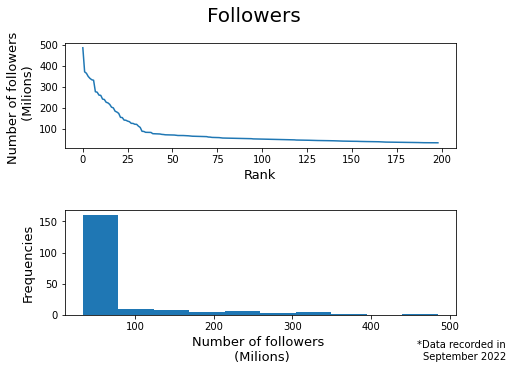

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7,5)
fig.suptitle("Followers", fontsize=20)
fig.subplots_adjust(hspace=0.6)
fig.text(1, .0001, "*Data recorded in\nSeptember 2022", ha="right")


ax1.plot(df["Followers(Millions)"])
ax1.set_xlabel("Rank",fontsize=13)
ax1.set_ylabel("Number of followers \n (Milions)",fontsize=13)


ax2.hist(df["Followers(Millions)"], bins = 10)
ax2.set_xlabel("Number of followers \n (Milions)",fontsize=13)
ax2.set_ylabel("Frequencies",fontsize=13)

Average Likes

Text(0, 0.5, 'Frequencies')

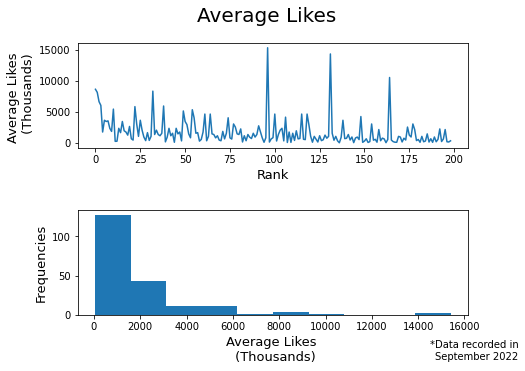

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7,5)
fig.suptitle("Average Likes", fontsize=20)
fig.subplots_adjust(hspace=0.6)
fig.text(1, .0001, "*Data recorded in\nSeptember 2022", ha="right")

ax1.plot(df["Avg. Likes(Thousands)"])
ax1.set_xlabel("Rank",fontsize=13)
ax1.set_ylabel("Average Likes \n (Thousands)",fontsize=13)


ax2.hist(df["Avg. Likes(Thousands)"], bins = 10)
ax2.set_xlabel("Average Likes \n (Thousands)",fontsize=13)
ax2.set_ylabel("Frequencies",fontsize=13)

Posts

Text(0, 0.5, 'Frequencies')

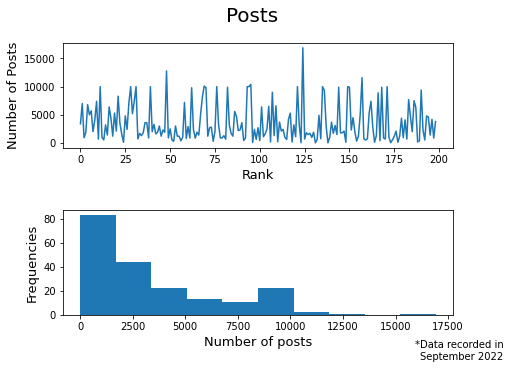

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7,5)
fig.suptitle("Posts", fontsize=20)
fig.subplots_adjust(hspace=0.6)
fig.text(1, .0001, "*Data recorded in\nSeptember 2022", ha="right")

ax1.plot(df["Posts"])
ax1.set_xlabel("Rank",fontsize=13)
ax1.set_ylabel("Number of Posts",fontsize=13)


ax2.hist(df["Posts"], bins = 10)
ax2.set_xlabel("Number of posts",fontsize=13)
ax2.set_ylabel("Frequencies",fontsize=13)

60-Day Engagement Rate

Text(0, 0.5, 'Frequencies')

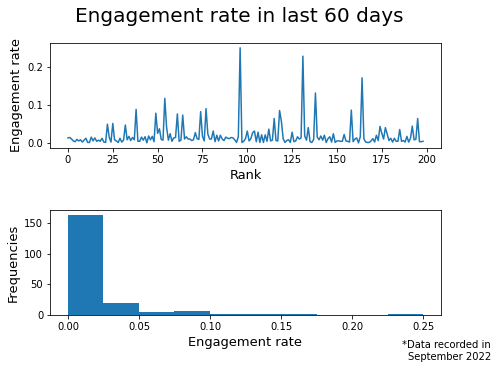

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7,5)
fig.suptitle("Engagement rate in last 60 days", fontsize=20)
fig.subplots_adjust(hspace=0.6)
fig.text(1, .0001, "*Data recorded in\nSeptember 2022", ha="right")

ax1.plot(df["60-Day Eng Rate"])
ax1.set_xlabel("Rank",fontsize=13)
ax1.set_ylabel("Engagement rate",fontsize=13)


ax2.hist(df["60-Day Eng Rate"], bins = 10)
ax2.set_xlabel("Engagement rate",fontsize=13)
ax2.set_ylabel("Frequencies",fontsize=13)

New post Average Likes

Text(0, 0.5, 'Frequencies')

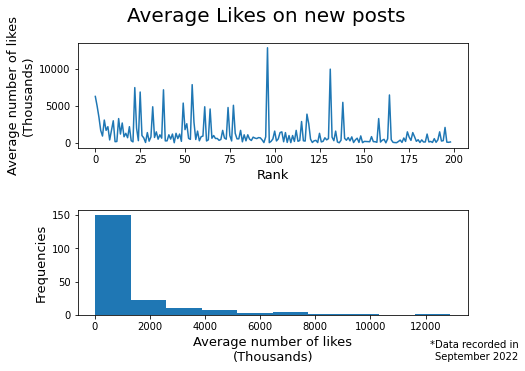

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7,5)
fig.suptitle("Average Likes on new posts", fontsize=20)
fig.subplots_adjust(hspace=0.6)
fig.text(1, .0001, "*Data recorded in\nSeptember 2022", ha="right")

ax1.plot(df["New Post Avg. Likes(Thousands)"])
ax1.set_xlabel("Rank",fontsize=13)
ax1.set_ylabel("Average number of likes\n(Thousands)",fontsize=13)


ax2.hist(df["New Post Avg. Likes(Thousands)"], bins = 10)
ax2.set_xlabel("Average number of likes\n(Thousands)",fontsize=13)
ax2.set_ylabel("Frequencies",fontsize=13)

Total Likes

Text(0, 0.5, 'Frequencies')

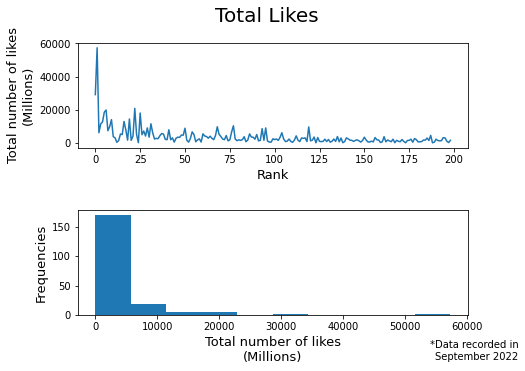

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7,5)
fig.suptitle("Total Likes", fontsize=20)
fig.subplots_adjust(hspace=0.6)
fig.text(1, .0001, "*Data recorded in\nSeptember 2022", ha="right")

ax1.plot(df["Total Likes(Millions)"])
ax1.set_xlabel("Rank",fontsize=13)
ax1.set_ylabel("Total number of likes\n(Millions)",fontsize=13)


ax2.hist(df["Total Likes(Millions)"], bins = 10)
ax2.set_xlabel("Total number of likes\n(Millions)",fontsize=13)
ax2.set_ylabel("Frequencies",fontsize=13)

Country or Region

Graph

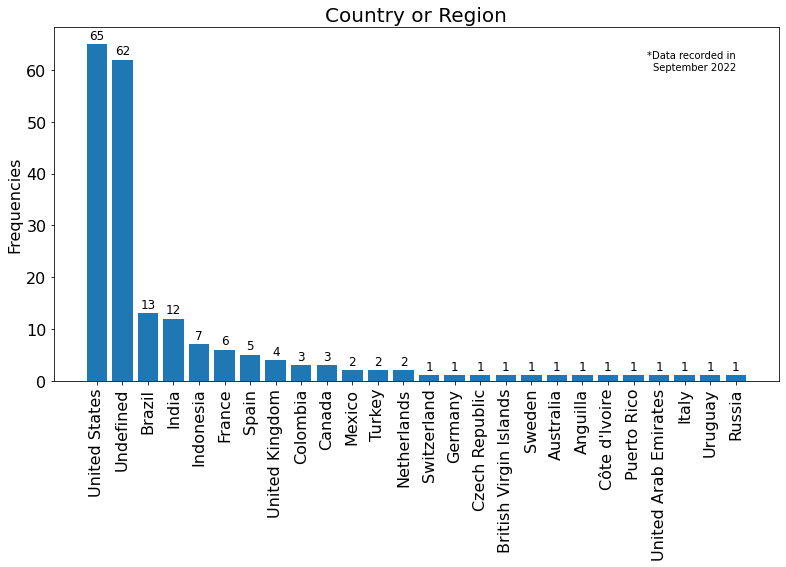

In [ ]:
countryNum = df["Country Or Region"].value_counts() #count values
plt.figure(figsize=(13,6.5))

plt.bar(countryNum.index, 
        countryNum,
        width = 0.8)
plt.title("Country or Region", fontsize=20)
plt.ylabel("Frequencies", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation = 90, fontsize=16)
plt.text(25, 60, "*Data recorded in\nSeptember 2022", ha="right")

#add value to top of bar
for index, value in enumerate(countryNum):
    plt.text(index,
             value+1, 
             str(value),
             size="large",
             ha="center")
plt.show()

# Bivariate Analysis



- Pairwise plot between numeric column in the data frame.

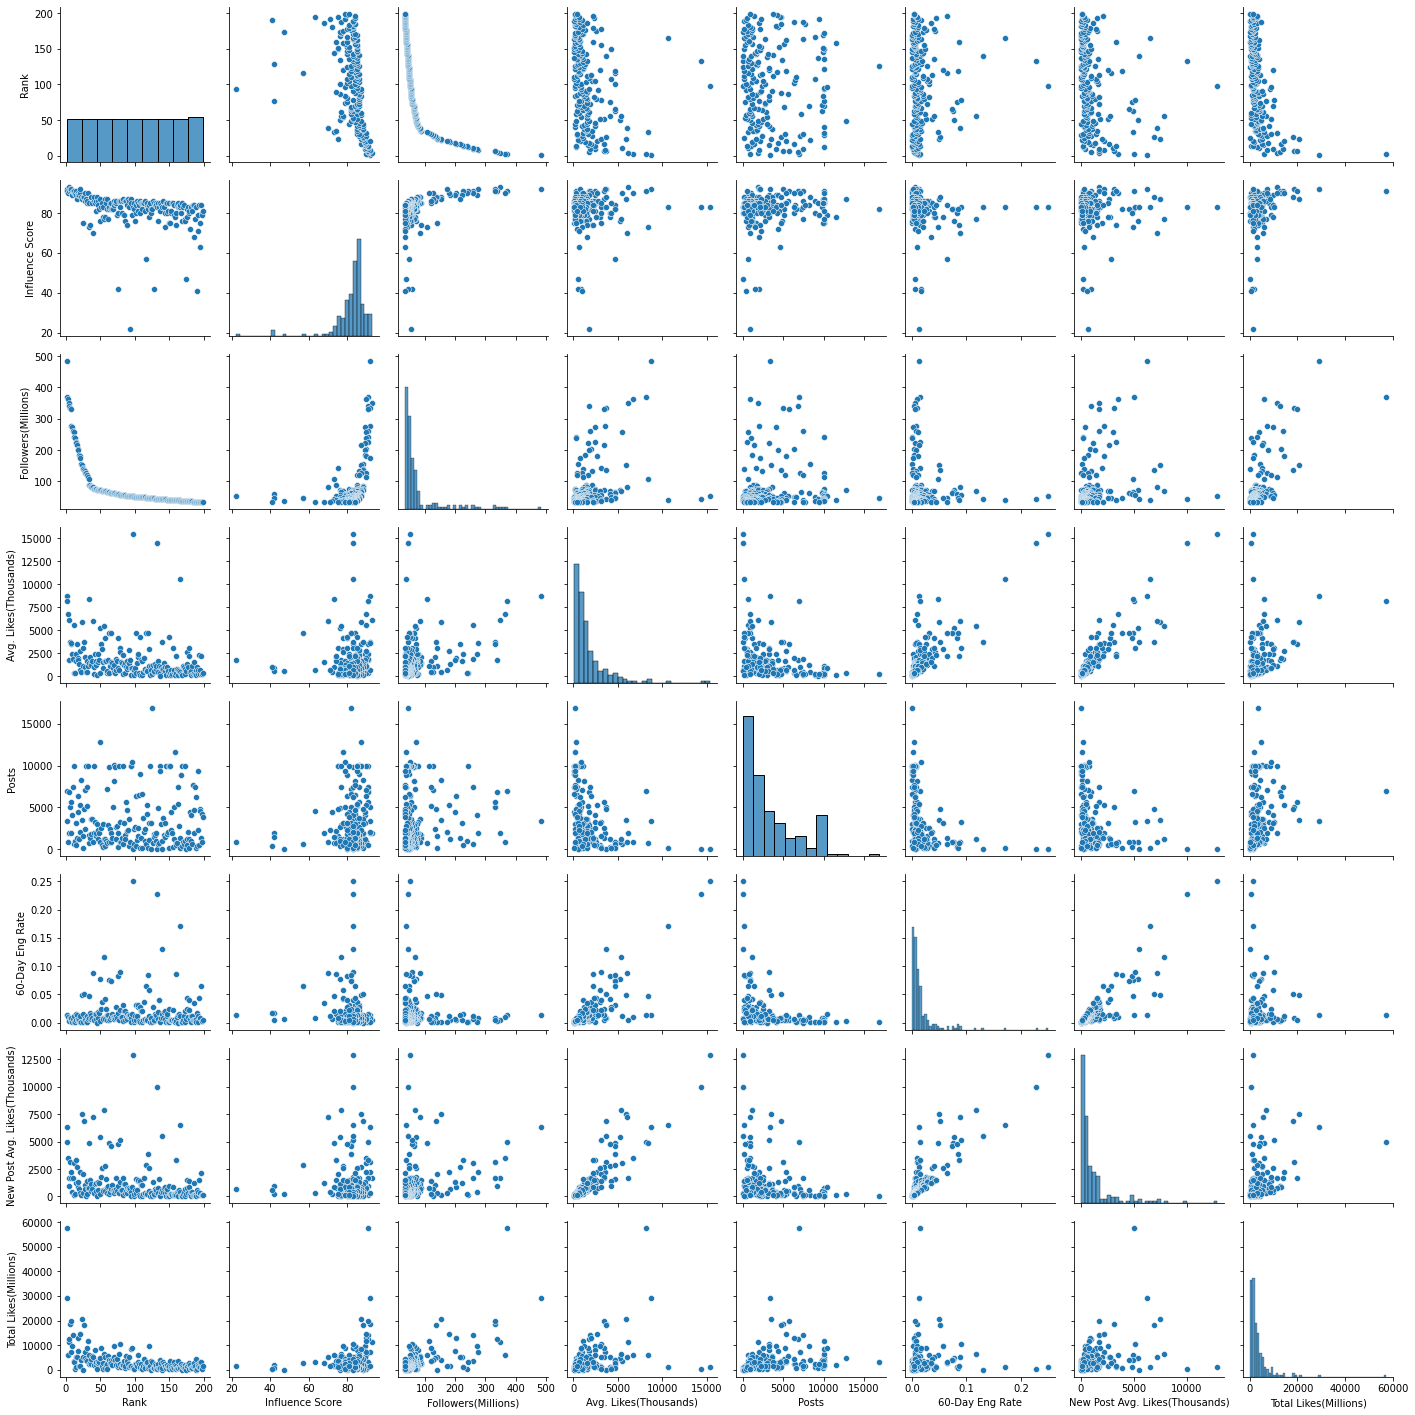

In [ ]:
sns.pairplot(df)

- Check the correlation between numeric columns

In [ ]:
pcorr = df.corr(method = "spearman")
pcorr

,Rank,Influence Score,Followers(Millions),Avg. Likes(Thousands),Posts,60-Day Eng Rate,New Post Avg. Likes(Thousands),Total Likes(Millions)
Rank,1.000000,-0.570337,-0.999985,-0.431987,-0.111481,-0.027294,-0.424344,-0.565363
Influence Score,-0.570337,1.000000,0.570987,0.124249,0.153369,-0.210072,0.094268,0.225545
Followers(Millions),-0.999985,0.570987,1.000000,0.432380,0.110836,0.027546,0.424594,0.564887
Avg. Likes(Thousands),-0.431987,0.124249,0.432380,1.000000,-0.509358,0.787411,0.933438,0.390207
Posts,-0.111481,0.153369,0.110836,-0.509358,1.000000,-0.570592,-0.456142,0.515051
60-Day Eng Rate,-0.027294,-0.210072,0.027546,0.787411,-0.570592,1.000000,0.870157,0.142344
New Post Avg. Likes(Thousands),-0.424344,0.094268,0.424594,0.933438,-0.456142,0.870157,1.000000,0.391281
Total Likes(Millions),-0.565363,0.225545,0.564887,0.390207,0.515051,0.142344,0.391281,1.000000


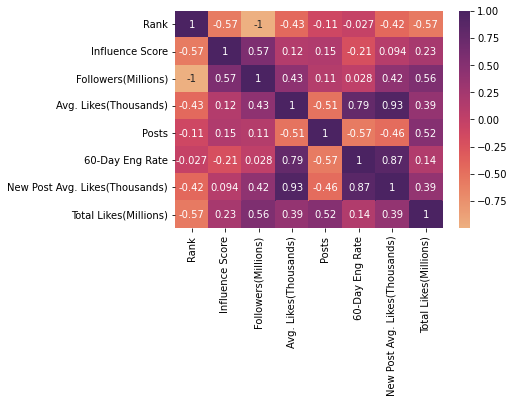

In [ ]:
sns.heatmap(pcorr, xticklabels=pcorr.columns, yticklabels=pcorr.columns, cmap="flare", annot=True, cbar=True)

The correlation map shows that the New Post Avg. Likes, Avg. Likes and 60-Day Eng Rate (the engagement rate within 60 days) are highly correlated. 

# Multivariate Analysis

- Linear Regression: 

    Build a multiple regression model to predict the average number of likes an user will receive for their new post based on the influence score, number of followers, and the average likes on their old posts.

In [12]:
# preparing the predictors and response variable
X = df[['Followers(Millions)', '60-Day Eng Rate']]
y = df['New Post Avg. Likes(Thousands)']

# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

#fitting the model
model.fit(X_train, y_train)

#getting the r_square of the model
model.score(X_test, y_test)

0.8789680384443778

Because the R square is high(0.799), the model we are building is a good model. 

In [13]:
#getting the model equation
intercept = model.intercept_
coef = model.coef_

print("The model equation is:  New Post Avg. Likes = ", intercept, "+ ", coef[0] , "* Followers + ", coef[1], "* Engagement Rate")# coef[2], "* Avg. Likes")

The model equation is:  New Post Avg. Likes =  -356.71446226721446 +  7.553347187512041 * Followers +  52150.09228351544 * Engagement Rate


K-Mean Clustering: 

Using the Elbow Method to decide the number of cluster

[686312322.2336683, 183830683.6955397, 103610510.39807217, 55980103.91613053, 35810217.328316204, 21751982.576478176, 14904447.197444092, 10699419.072444094, 8421681.771398861]


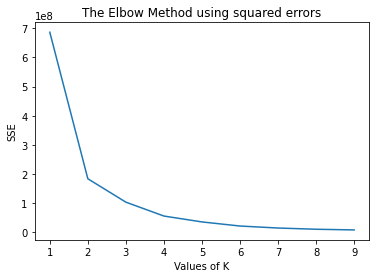

In [14]:
from sklearn.cluster import KMeans

#choose follow and new post avg. likes columns
newdf = pd.DataFrame(df, columns=["Followers(Millions)", 'New Post Avg. Likes(Thousands)'])
SSE = []
newdf
for k in range(1, 10):
  kmeanModel = KMeans(n_clusters = k).fit(newdf)
  kmeanModel.fit(newdf)
  SSE.append(kmeanModel.inertia_)
print(SSE)
plt.plot(range(1, 10), SSE)
plt.xlabel('Values of K')
plt.ylabel('SSE')
plt.title('The Elbow Method using squared errors')
plt.show()

=> Optimal number of cluster = 3

In [15]:
kmean_2 = KMeans(n_clusters=2).fit(newdf)
kmean_2.fit(newdf)
kmean_2.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

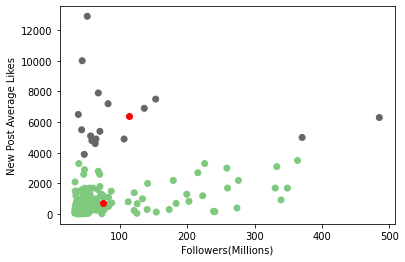

In [16]:
centroids = kmean_2.cluster_centers_
plt.scatter(newdf["Followers(Millions)"], newdf['New Post Avg. Likes(Thousands)'], c= kmean_2.labels_.astype(float), cmap="Accent")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.xlabel("Followers(Millions)")
plt.ylabel("New Post Average Likes")
plt.show()

Creat a desirability function to choose the top 10 most influential account

In [18]:
desire_df = pd.DataFrame()
desire_df["Channel Info"] = df["Channel Info"]
numeric = ["Followers(Millions)", "60-Day Eng Rate", "New Post Avg. Likes(Thousands)"]
desire_df[numeric] = df[numeric] / df[numeric].max()
desire_df

,Channel Info,Followers(Millions),60-Day Eng Rate,New Post Avg. Likes(Thousands)
0,cristiano,1.000000,0.052,0.488372
1,kyliejenner,0.764015,0.056,0.387597
2,leomessi,0.750000,0.040,0.271318
3,selenagomez,0.718879,0.020,0.131783
4,therock,0.699505,0.012,0.072248
...,...,...,...,...
194,khabib_nurmagomedov,0.069250,0.036,0.023698
195,danbilzerian,0.069250,0.256,0.162791
196,raisa6690,0.069250,0.012,0.008000
197,luansantana,0.069044,0.012,0.006403


In [19]:
desire_df['Total'] = desire_df.sum(axis = 1, numeric_only = True)
desire_df

,Channel Info,Followers(Millions),60-Day Eng Rate,New Post Avg. Likes(Thousands),Total
0,cristiano,1.000000,0.052,0.488372,1.540372
1,kyliejenner,0.764015,0.056,0.387597,1.207612
2,leomessi,0.750000,0.040,0.271318,1.061318
3,selenagomez,0.718879,0.020,0.131783,0.870662
4,therock,0.699505,0.012,0.072248,0.783753
...,...,...,...,...,...
194,khabib_nurmagomedov,0.069250,0.036,0.023698,0.128947
195,danbilzerian,0.069250,0.256,0.162791,0.488040
196,raisa6690,0.069250,0.012,0.008000,0.089250
197,luansantana,0.069044,0.012,0.006403,0.087447


In [20]:
sorted_df = desire_df.sort_values(by=['Total'], ascending = False)
sorted_df[:15] #select top 15 players with highest total desirable scores

,Channel Info,Followers(Millions),60-Day Eng Rate,New Post Avg. Likes(Thousands),Total
96,thv,0.106554,1.000,1.000000,2.106554
131,j.m,0.091096,0.912,0.775194,1.778290
0,cristiano,1.000000,0.052,0.488372,1.540372
164,rkive,0.079143,0.684,0.503876,1.267019
54,tomholland2013,0.140354,0.468,0.612403,1.220758
1,kyliejenner,0.764015,0.056,0.387597,1.207612
22,zendaya,0.315952,0.196,0.581395,1.093348
38,lalalalisa_m,0.170239,0.352,0.558140,1.080379
2,leomessi,0.750000,0.040,0.271318,1.061318
138,badbunnypr,0.089448,0.524,0.426357,1.039804
